# Shark Atttack Visualization

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shark-attack-dataset/list_coor_australia.csv
/kaggle/input/shark-attack-dataset/attacks.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Cleaning the Data

In [3]:
attack_df = pd.read_csv('/kaggle/input/shark-attack-dataset/attacks.csv')
attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
# There is a lot of missing value at the end of this dataset!
attack_df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
attack_df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
attack_df[attack_df['Date'].isna()].sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
15188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# I will drop row that contains NaN value using Date as a base
attack_df = attack_df[~attack_df['Date'].isna()]
attack_df.isna().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [8]:
attack_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [9]:
# For this visualization, I want Date to Species columns only 
attack_df = attack_df.loc[:,"Case Number":"Species "]
attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


# Year of the Attack

In [10]:
# Checking the Year Column
attack_df['Year'].unique()

# There are wired input like 0 500 and so on. Lets look into that.

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [11]:
attack_df[attack_df['Year'] < 1543][['Case Number','Date']]

# Given that year can be extract from either Case Number or Date column, with these given input,
# mostly in range. I will not include these data points in the visulization

,Case Number,Date
6174,0500.00.00,Circa 500 A.D.
6175,0077.00.00,77 A.D.
6176,0005.00.00,Ca. 5 A.D.
6177,0000.0214,Ca. 214 B.C.
6178,0000.0336,Ca. 336.B.C..
...,...,...
6297,ND.0005,Before 1903
6298,ND.0004,Before 1903
6299,ND.0003,1900-1905
6300,ND.0002,1883-1889


In [12]:
attack_df = attack_df[attack_df['Year'] >= 1543]
attack_df['Year'].unique()

# No longer have wired year input

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [13]:
byYear_attack = attack_df.groupby('Year')['Date'].count().reset_index()
fig = px.line(byYear_attack,x='Year', y='Date', title='Shark Attack by Year')
fig.show()

In [14]:
# Close up from 1850 to 2018
byYear_attack = attack_df.groupby('Year')['Date'].count().reset_index()
fig = px.line(byYear_attack.iloc[77:,:],
              x='Year', y='Date', title='Shark Attack from 1853 to 2018')
fig.show()

# Sex

In [15]:
# Removing the Space in Sex column name
attack_df = attack_df.rename(columns={'Sex ':'Sex'})
attack_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species '],
      dtype='object')

In [16]:
# Checking the unique value of Sex
attack_df['Sex'].unique()

# F and M represents Female and Male respectively
# There are a few of uncategories letter - fixing that 

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [17]:
# Current Count 
attack_df['Sex'].value_counts()

M      4985
F       624
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [18]:
# Modifying the value in Sex column
# Fill NaN value first
attack_df['Sex'] = attack_df['Sex'].fillna("Unknown")

# Male
attack_df.loc[attack_df['Sex'].str.contains("M|M "), 'Sex'] = "Male"

# Female
attack_df.loc[attack_df['Sex'].str.contains("F"), 'Sex'] = "Female"

# Value other than Female and Male becomes Unspecified
attack_df.loc[~attack_df['Sex'].str.contains("Male|Female"), 'Sex'] = "Unknown"

bySex_count = attack_df['Sex'].value_counts().reset_index().rename(columns={'index':'Gender','Sex':'Count'})
bySex_count

,Gender,Count
0,Male,4987
1,Female,624
2,Unknown,561


In [19]:
# Distribution Male, Female and Unspecified
fig = px.pie(data_frame = bySex_count,
             values = 'Count',
             names = 'Gender',
             title = 'Shark Attack by Gender',
             color_discrete_sequence=px.colors.qualitative.Pastel
             )

fig.update_traces(textposition ='outside',
                  textinfo = 'label+percent')
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Gender',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

# Activity and Type

In [20]:
# Checking count for Activity
attack_df['Activity'].value_counts().head()

Surfing         970
Swimming        853
Fishing         423
Spearfishing    332
Bathing         159
Name: Activity, dtype: int64

In [21]:
attack_df['Type'].value_counts()

Unprovoked      4483
Provoked         567
Invalid          544
Sea Disaster     233
Boating          203
Boat             135
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [22]:
# After looking at the type of the attack, it seems that "Boating", "Boat", and "Boatomg" meant the same type 
# of attack, I will change the type of attack to just Boat

attack_df.loc[(attack_df['Type'] == 'Boating') | (attack_df['Type'] == 'Boatomg'), "Type"] = "Boat"
byType_count = attack_df['Type'].value_counts().reset_index().rename(columns={'Type':'Count','index':'Type'})
byType_count

,Type,Count
0,Unprovoked,4483
1,Provoked,567
2,Invalid,544
3,Boat,339
4,Sea Disaster,233
5,Questionable,2


In [23]:
# Distribution Type of Attack
fig = px.pie(data_frame = byType_count,
             values = 'Count',
             names = 'Type',
             title = 'Shark Attack Type',
             color_discrete_sequence=px.colors.qualitative.Safe
             )

fig.update_traces(textposition ='inside',
                  textinfo = 'label+percent')
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Type',
                  uniformtext_minsize=18,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

In [24]:
attack_df.groupby(['Type','Activity'])['Date'].count()

Type        Activity                                                               
Boat                                                                                   1
            Adrift after wave swamped engine                                           1
            After rowing skiff was holed by shark, he was attempting to swim ashore    1
            American schooner Orator capsized                                          1
            Attempting to chase shark out to sea                                       1
                                                                                      ..
Unprovoked  boat from City of Naples capsized                                          1
            boat from the Austrian ship Elizabeth                                      1
            male                                                                       1
            preparing to go skin diving                                                1
            p�cheur de bic

# Shark Species

In [25]:
attack_df.rename(columns={'Species ':'Species'},inplace=True)
attack_df['Species'].value_counts()

White shark                                               162
Shark involvement prior to death was not confirmed        105
Invalid                                                   101
Shark involvement not confirmed                            88
Tiger shark                                                70
                                                         ... 
Blue shark, 2m                                              1
Small dusky shark or blackfin shark                         1
Reported to involve a 4 m white shark                       1
Mako shark, 3 m [10'], 200-kg [441-lb]                      1
1.5 m to 2.1 m [5' to 7'] shark, possibly a mako shark      1
Name: Species, Length: 1535, dtype: int64

In [26]:
import re

# Filling NaN value with string "Unknown shark"
attack_df['Species'] = attack_df['Species'].fillna('Unknown shark')

# Create new column to stored the extracted Shark species
attack_df['New Species'] = None

# Regular Expression pattern used to extract shark species (ultimately getting everything infront of the word "shark")
shark_pattern = r'.* (shark|Shark)'

# Looping through every row in the dataFrame
for row in range(len(attack_df)):
    try:
        shark_species = re.search(shark_pattern, attack_df.iat[row, attack_df.columns.get_loc('Species')]).group()
        attack_df.iat[row, attack_df.columns.get_loc('New Species')] = shark_species
    except:
        # Assuming that if there is nothing before string shark OR doesn't contain string shark at all,
        # then I will put the string Shark involvement not confirmed instead
        attack_df.iat[row, attack_df.columns.get_loc('New Species')] = "Shark involvement not confirmed"

bySpecies_count = attack_df['New Species'].value_counts().reset_index().rename(columns={'New Species':'Count','index':'Species'})
bySpecies_count.head()

,Species,Count
0,Unknown shark,2744
1,Shark involvement not confirmed,555
2,White shark,424
3,Tiger shark,230
4,Bull shark,116


In [27]:
# Visualization - I won't be including first two rows of this dataFrame because the species of Shark is unknwon
fig = px.pie(data_frame = bySpecies_count.iloc[2:12,:],
             values = 'Count',
             names = 'Species',
             title = 'Top 10 Shark Species',
             color_discrete_sequence=px.colors.qualitative.Prism
             )

fig.update_traces(textposition ='outside',
                  textinfo = 'percent', pull = [0.1]*10)
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Shark Type',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

# Country

In [28]:
byCountry_count = attack_df['Country'].value_counts().reset_index().rename(columns={'Country':'Count','index':'Country'})
byCountry_count.head()

,Country,Count
0,USA,2212
1,AUSTRALIA,1320
2,SOUTH AFRICA,571
3,PAPUA NEW GUINEA,130
4,NEW ZEALAND,127


In [29]:
# World Map Plot
fig = px.choropleth(data_frame = byCountry_count,
                    locations = 'Country',
                    color = 'Count',
                    locationmode = 'country names',
                    scope = 'world',
                    title = 'Shark Attack around the World')

fig.show()

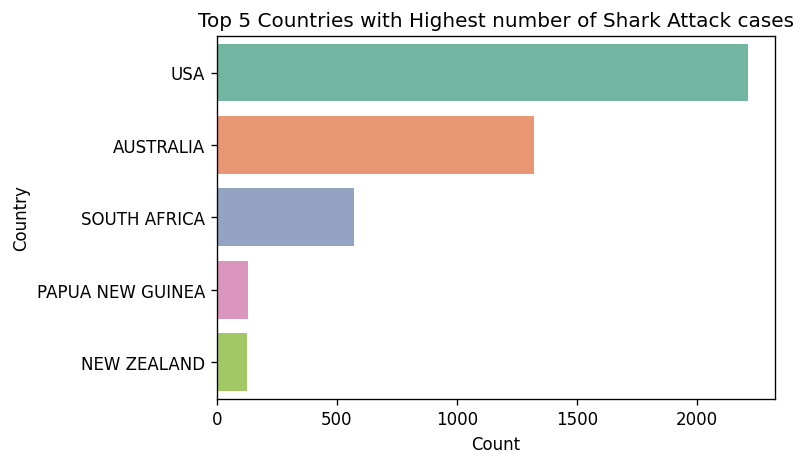

In [30]:
# Top 5 Country with highest number of Shark Attack

plt.figure(dpi=120)
sns.barplot(data=byCountry_count.head(5), y='Country', x='Count', palette='Set2')
plt.title('Top 5 Countries with Highest number of Shark Attack cases')
plt.show()

### Shark Attack in the USA

In [31]:
byAreaUS_count = attack_df[attack_df['Country'] == "USA"]['Area'].value_counts().reset_index().rename(columns={'Area':'Count','index':'Area'})
byAreaUS_count.head()

,Area,Count
0,Florida,1029
1,Hawaii,295
2,California,287
3,South Carolina,158
4,North Carolina,100


In [32]:
# Changing Area to State Code
# got this dict of states from this medium post (here is the link): 
# https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd

states_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
               'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC',
               'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN',
               'Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD',
               'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
               'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
               'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH',
               'Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC',
               'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA',
               'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

byAreaUS_count['State Code'] = byAreaUS_count['Area'].map(states_code)
byAreaUS_count.head()

,Area,Count,State Code
0,Florida,1029,FL
1,Hawaii,295,HI
2,California,287,CA
3,South Carolina,158,SC
4,North Carolina,100,NC


In [33]:
# Shark Attack in the USA
fig = px.choropleth(data_frame = byAreaUS_count,
                    locations = 'State Code',
                    color = 'Count',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    title = 'Shark Attack in the USA',
                    hover_name = 'Area')

fig.show()

# Condition Fatal (Y/N)

In [34]:
attack_df['Fatal (Y/N)'].value_counts()

N          4227
Y          1327
UNKNOWN      70
 N            7
M             1
N             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [35]:
attack_df['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [36]:
attack_df['Fatal (Y/N)'].value_counts()

N          4227
Y          1327
UNKNOWN      70
 N            7
M             1
N             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [37]:
# Filling in NaN value with UNKNOWN
attack_df['Fatal (Y/N)'] = attack_df['Fatal (Y/N)'].fillna('UNKNOWN')

# Strip Space before N
attack_df['Fatal (Y/N)'] = attack_df['Fatal (Y/N)'].str.strip()

# Changing N to NO
attack_df.loc[attack_df['Fatal (Y/N)'] == "N", 'Fatal (Y/N)'] = 'NO'

# Changing Y to YES and adding them up
attack_df.loc[attack_df['Fatal (Y/N)'].str.contains("Y|y"), 'Fatal (Y/N)'] = "YES"

# Change all other input that is not YES or NO to UNKNOWN
attack_df.loc[~attack_df['Fatal (Y/N)'].str.contains("YES|NO")] = "UNKNOWN"

byFatal_count = attack_df['Fatal (Y/N)'].value_counts().reset_index().rename(columns = {'Fatal (Y/N)':'Count','index':'Fatality Status'})
byFatal_count

,Fatality Status,Count
0,NO,4235
1,YES,1328
2,UNKNOWN,609


In [38]:
# Distribution Type of Attack
fig = px.pie(data_frame = byFatal_count,
             values = 'Count',
             names = 'Fatality Status',
             title = 'Fatality Status after Shark Attacks',
             color_discrete_sequence=px.colors.qualitative.Safe
             )

fig.update_traces(textposition ='inside',
                  textinfo = 'label+percent')
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Fatality Status',
                  uniformtext_minsize=18,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

# Reported Time of the Incident

In [39]:
attack_df['Time'].value_counts().head()

Afternoon    183
11h00        128
Morning      118
12h00        109
15h00        108
Name: Time, dtype: int64

In [40]:
# Filling NaN value with string "Unknown shark"
attack_df['Time'] = attack_df['Time'].fillna('Unknown')

# Create new column to stored the extracted Shark species
attack_df['New Time'] = None

# Regular Expression pattern used to extract shark species (ultimately getting everything infront of the word "shark")
time_pattern = r'[0-9]{2}h[0-9]{2}'

# Looping through every row in the dataFrame
for row in range(len(attack_df)):
    try:
        time = re.search(time_pattern, attack_df.iat[row, attack_df.columns.get_loc('Time')]).group()
        attack_df.iat[row, attack_df.columns.get_loc('New Time')] = time
    except:
        # Putting in the orignial value from the original Date column
        attack_df.iat[row, attack_df.columns.get_loc('New Time')] = attack_df['Time'].iloc[row]


byTime_count = attack_df['New Time'].value_counts().reset_index().rename(columns={'New Time':'Count','index':'Time'})
byTime_count.head()

,Time,Count
0,Unknown,3231
1,Afternoon,183
2,11h00,131
3,Morning,118
4,12h00,113


In [41]:
# Distribution Time of Shark Attack
fig = px.pie(data_frame = byTime_count.iloc[1:11,:],
             values = 'Count',
             names = 'Time',
             title = 'Time of Shark Attack',
             color_discrete_sequence=px.colors.qualitative.Set2
             )

fig.update_traces(textposition ='outside',
                  textinfo = 'label+percent',
                  pull = [0.1] * 10)
fig.update_layout(paper_bgcolor='cornsilk',
                  legend_title = 'Time of Incident',
                  uniformtext_minsize=18,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

# Thank you for checking out my nootebook